### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
new_df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 1.77 s


In [3]:
new_df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
new_df.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'level',
       'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt',
       'is_self_coach', 'has_student_cnt', 'belongs_to_class_cnt',
       'has_class_cnt', 'date_count', 'difficulty', 'learning_stage',
       'user_city_chc', 'user_city_cy', 'user_city_hc', 'user_city_hlc',
       'user_city_ilc', 'user_city_kh', 'user_city_kl', 'user_city_km',
       'user_city_lj', 'user_city_ml', 'user_city_ntct', 'user_city_ntpc',
       'user_city_phc', 'user_city_ptc', 'user_city_tc', 'user_city_tn',
       'user_city_tp', 'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Splitting Train Set and Test Set

In [51]:
from sklearn.model_selection import train_test_split

X = new_df.drop('level', axis=1)
y = new_df['level']

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:] = sc.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test

In [45]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38066     0     0     1     0]
 [    1 42464    96    29    16]
 [   23   700  4857   243   150]
 [   16   302   626  1844   644]
 [   12   163   387   531  5342]]


0.9591764839969745

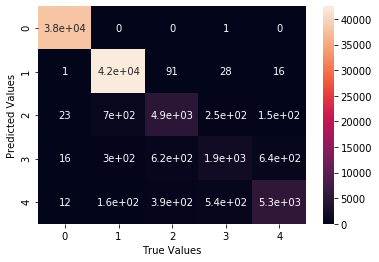

In [33]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

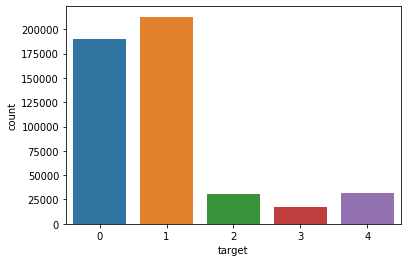

In [26]:
df = pd.DataFrame(X).copy()
df['target'] = y
sns.countplot('target', data=df)

In [27]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

#plot_2d_space(X_rus, y_rus, 'Random under-sampling')

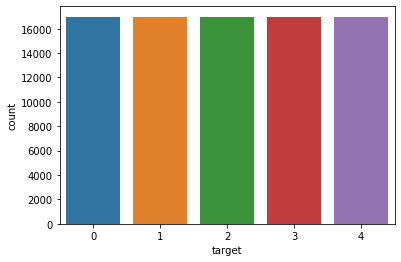

In [28]:
df = pd.DataFrame(X).copy()
df['target'] = y
sns.countplot('target', data=df)

### Correlation with the Target

In [9]:
X.corr()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,points,badges_cnt,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
problem_number,1.000000,0.905918,-0.031733,0.066955,0.111593,0.708598,0.256721,0.346266,0.103062,0.159371,...,0.013570,-0.005947,-0.006154,0.023225,-0.018376,0.006998,-0.017731,0.034171,-0.015497,-0.002890
is_correct,0.905918,1.000000,-0.085715,-0.047544,-0.098654,0.391368,0.167151,0.441241,0.107919,0.118990,...,0.001945,0.010608,-0.006718,0.004850,-0.016881,0.006224,-0.003960,0.015197,-0.016459,-0.001062
total_sec_taken,-0.031733,-0.085715,1.000000,0.160493,0.230831,0.075865,0.022625,-0.137476,-0.014930,0.009038,...,0.012366,0.001817,0.015190,-0.002874,0.019661,0.001890,-0.003877,0.011625,-0.007140,-0.008792
total_attempt_cnt,0.066955,-0.047544,0.160493,1.000000,0.484327,0.238563,0.065427,-0.142614,-0.006988,0.053660,...,0.007427,-0.020244,-0.005028,0.023184,0.016030,-0.000614,-0.039333,0.029531,0.012548,0.002431
used_hint_cnt,0.111593,-0.098654,0.230831,0.484327,1.000000,0.445732,0.104781,-0.279128,-0.052125,0.041210,...,0.018643,-0.032583,-0.001899,0.032453,0.021192,0.005114,-0.050396,0.026902,0.039131,-0.008754
is_hint_used,0.708598,0.391368,0.075865,0.238563,0.445732,1.000000,0.303442,0.060435,0.047985,0.163429,...,0.025342,-0.026925,-0.001639,0.031685,-0.011283,0.002272,-0.038659,0.059840,-0.005829,-0.008300
is_downgrade,0.256721,0.167151,0.022625,0.065427,0.104781,0.303442,1.000000,0.230422,0.064965,0.084492,...,0.008110,-0.005181,0.001076,0.010157,-0.001009,0.003216,-0.016135,0.043226,-0.012744,0.004218
is_upgrade,0.346266,0.441241,-0.137476,-0.142614,-0.279128,0.060435,0.230422,1.000000,0.288383,0.187393,...,-0.007826,0.052425,-0.006425,-0.022231,-0.034860,0.000802,0.033562,0.001494,-0.042199,0.027298
points,0.103062,0.107919,-0.014930,-0.006988,-0.052125,0.047985,0.064965,0.288383,1.000000,0.778658,...,-0.038058,0.031539,-0.025489,-0.044526,-0.044230,0.001792,0.002427,0.036851,-0.036949,-0.014394
badges_cnt,0.159371,0.118990,0.009038,0.053660,0.041210,0.163429,0.084492,0.187393,0.778658,1.000000,...,-0.018446,-0.036502,-0.024281,-0.028117,-0.029625,0.014042,-0.021371,0.067128,-0.013764,-0.048262


In [10]:
X.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'points',
       'badges_cnt', 'user_grade', 'has_teacher_cnt', 'is_self_coach',
       'has_student_cnt', 'belongs_to_class_cnt', 'has_class_cnt',
       'date_count', 'difficulty', 'learning_stage', 'user_city_chc',
       'user_city_cy', 'user_city_hc', 'user_city_hlc', 'user_city_ilc',
       'user_city_kh', 'user_city_kl', 'user_city_km', 'user_city_lj',
       'user_city_ml', 'user_city_ntct', 'user_city_ntpc', 'user_city_phc',
       'user_city_ptc', 'user_city_tc', 'user_city_tn', 'user_city_tp',
       'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Wraper Methods

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_upgrade', 'points', 'badges_cnt', 'is_self_coach']
[1.31817078e-01 1.45561060e-01 3.56460434e-02 3.10496363e-02
 4.06297572e-02 2.44765071e-02 4.86351824e-03 3.17763719e-01
 3.84036649e-02 3.16838612e-02 1.62875667e-02 1.05939502e-02
 8.98842902e-02 2.55299575e-03 1.17921594e-02 4.05370943e-03
 1.33262003e-02 7.22619581e-03 4.53262210e-03 1.83407175e-03
 1.83162189e-03 2.29345065e-03 1.12262764e-03 9.27238405e-04
 2.12757018e-03 1.08388563e-03 1.04571680e-03 2.17949280e-06
 1.46126760e-03 1.54253637e-03 3.91346375e-03 1.62618895e-04
 1.58850234e-03 3.56575071e-03 2.31565425e-03 4.05418575e-03
 1.23507804e-03 3.86062319e-03 1.88742120e-03]


In [12]:
X = X[['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt', 'is_self_coach']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

### Amount of Variation

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
X_train = sel.fit_transform(X_train)
X_test = sel.transform(X_test)

In [16]:
X_train.shape

(67936, 10)

### PCA

In [17]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
X_train.shape

(67936, 7)

## Data Modeling

In [66]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.03 %
Standard Deviation: 0.46 %


#### KNN

In [67]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3317   17    4    3    0]
 [  29 3138  113   54    5]
 [   8  296 2728  367   69]
 [  17  161  755 1996  479]
 [   1   38  370  787 2232]]


0.789625529910504

SVM

In [20]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3341    0    0    0    0]
 [   0 3304   34    1    0]
 [  20  418 2884  134   12]
 [  15  289  977 1314  813]
 [   4   91  549  481 2303]]


0.7740226095148375

In [23]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.57 %
Standard Deviation: 0.40 %


In [24]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

KeyboardInterrupt: 

# XGboost

In [73]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3331    6    1    3    0]
 [  17 3159  120   42    1]
 [   9  274 2797  353   35]
 [  12  149  775 2129  343]
 [   1   34  380  860 2153]]


0.7989284032030146